In [1]:
### 1. Veri Setinin Yüklenmesi
## 1.1 scikit-learn’den Veri Seti Yükleme


In [2]:
# 1.1 scikit-learn’den Veri Seti Yükleme

from sklearn.datasets import load_breast_cancer

# Breast Cancer Wisconsin veri setini yükle
data = load_breast_cancer()

# X: özellikler, y: hedef (sınıf etiketi)
X = data.data
y = data.target

print("X şekli (satır, sütun):", X.shape)
print("y şekli:", y.shape)
print("Sınıf isimleri:", data.target_names)  # hedef değişkende kötü huylu/ iyi huylu tümör sınıfları mevcut.


X şekli (satır, sütun): (569, 30)
y şekli: (569,)
Sınıf isimleri: ['malignant' 'benign']


In [3]:
# 1.2 Veri Çerçevesi Oluşturma
# X (özellikler) ve y (hedef) için DataFrame oluşturma
import numpy as np
import pandas as pd

# Özellik isimlerini al
feature_names = data.feature_names

# Özellikler için DataFrame
df_X = pd.DataFrame(X, columns=feature_names)

# Hedef değişkeni için Series
df_y = pd.Series(y, name='target')

# İstersen tek bir birleşik DataFrame de oluşturabiliriz:
df = df_X.copy()
df["target"] = df_y

# İlk 5 satırı göster
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df["target"].value_counts()  # veri dağılımı


,count
target,
1,357
0,212


In [5]:
# 0 ve 1 değerlerini sınıf isimleriyle eşleştir

# Önce eşleştirme sözlüğü oluşturalım
target_mapping = {i: name for i, name in enumerate(data.target_names)}
print("Target mapping:", target_mapping)

# df içine yeni bir sütun ekleyelim
df["target_name"] = df["target"].map(target_mapping)

# İlk 5 satıra bakalım
df[["target", "target_name"]].head()


Target mapping: {0: np.str_('malignant'), 1: np.str_('benign')}


,target,target_name
0,0,malignant
1,0,malignant
2,0,malignant
3,0,malignant
4,0,malignant


In [ ]:
df["target_name"].value_counts()


,count
target_name,
benign,357
malignant,212


In [ ]:
## 2. Veri Seti Kalite Kontrolleri

In [ ]:
# 2.1 Eksik Değer Analizi

# Her sütunda kaç adet eksik değer var?
missing_per_column = df.isnull().sum()

print("Her sütundaki eksik değer sayıları:\n")
print(missing_per_column)

print("\nToplam eksik değer sayısı:", missing_per_column.sum())


Her sütundaki eksik değer sayıları:

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
target_name                0
dtype: int64

Toplam eksik değer sa

In [ ]:
## Breast Cancer Wisconsin veri setinde hiç eksik değer yoktur.
## Çıktıda göründüğü üzere tüm sütunlar için 0, eksik değer problemi yok demektir ve doldurma (imputasyon) yapmamıza gerek yok.

In [ ]:
## 2.2 Aykırı Değer (Outlier) Analizi – IQR Yöntemi

In [ ]:
# 2.2 Aykırı Değer Analizi (IQR yöntemi)

# Sadece özellikler üzerinde çalışacağız (df_X)
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer: Q1 - 1.5*IQR'den küçük veya Q3 + 1.5*IQR'den büyük olanlar
is_outlier = (df_X < (Q1 - 1.5 * IQR)) | (df_X > (Q3 + 1.5 * IQR))

# Her sütundaki aykırı değer sayısı
outlier_counts = is_outlier.sum().sort_values(ascending=False)

print("Sütun bazında aykırı değer sayıları (en fazla olandan en aza doğru):\n")
print(outlier_counts)

# En az bir aykırı değer içeren satır sayısı
rows_with_outlier = is_outlier.any(axis=1).sum()
print(f"\nEn az bir aykırı değere sahip satır sayısı: {rows_with_outlier} / {df.shape[0]}")


Sütun bazında aykırı değer sayıları (en fazla olandan en aza doğru):

area error                 65
radius error               38
perimeter error            38
worst area                 35
smoothness error           30
fractal dimension error    28
compactness error          28
symmetry error             27
mean area                  25
worst fractal dimension    24
worst symmetry             23
concavity error            22
texture error              20
concave points error       19
mean concavity             18
worst radius               17
worst compactness          16
mean compactness           16
mean symmetry              15
mean fractal dimension     15
worst perimeter            15
mean radius                14
mean perimeter             13
worst concavity            12
mean concave points        10
mean texture                7
worst smoothness            7
mean smoothness             6
worst texture               5
worst concave points        0
dtype: int64

En az bir aykırı

In [ ]:
# Bazı özelliklerde (örn. belirli “worst” veya “mean” ölçümlerinde) diğerlerine göre daha fazla aykırı değer görebiliyoruz.
# Bu aykırı değerler, tümör boyutu ve doku özelliklerinin çok uç (agresif) olduğu hastalara karşılık geliyor olabilir.
# Şimdilik sadece tespit ediyoruz,MLP eğitiminde önce EDA’ya bakacağız.

In [ ]:
## 2.2 Aykırı Değer (Outlier) Analizi – Boxplot İncelemesi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook içinde daha güzel görünmesi için (opsiyonel)
sns.set(style="whitegrid")


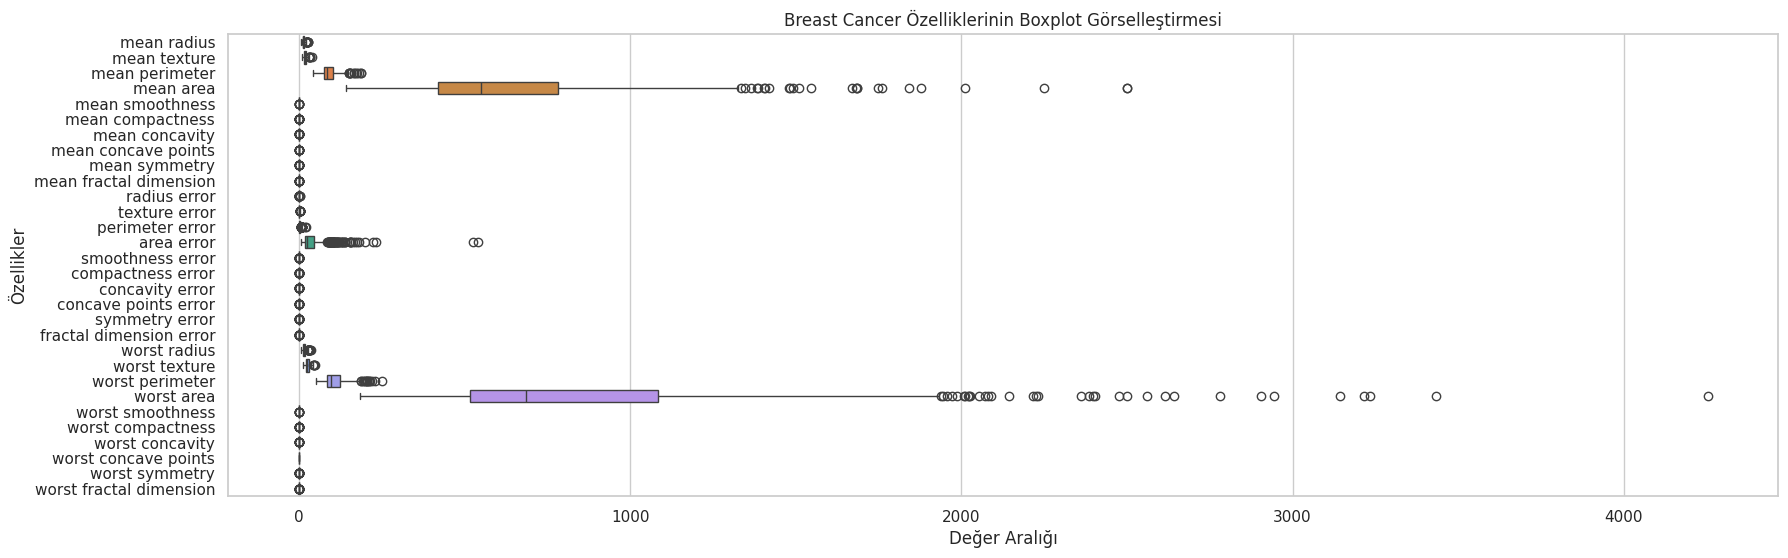

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_X, orient="h")  # yatay kutular, daha okunaklı
plt.title("Breast Cancer Özelliklerinin Boxplot Görselleştirmesi")
plt.xlabel("Değer Aralığı")
plt.ylabel("Özellikler")
plt.show()


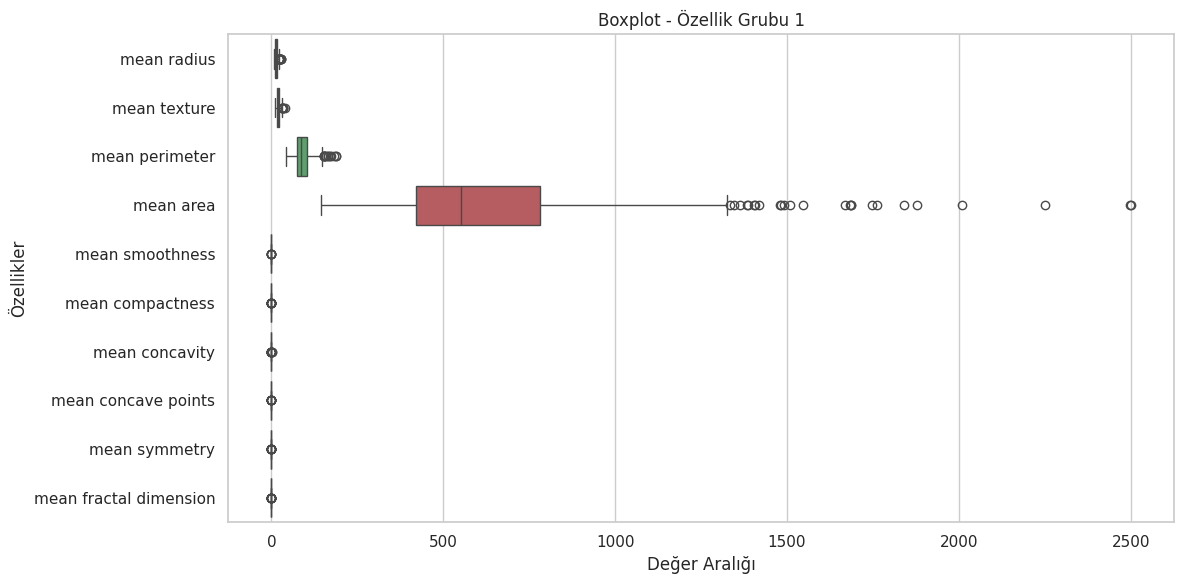

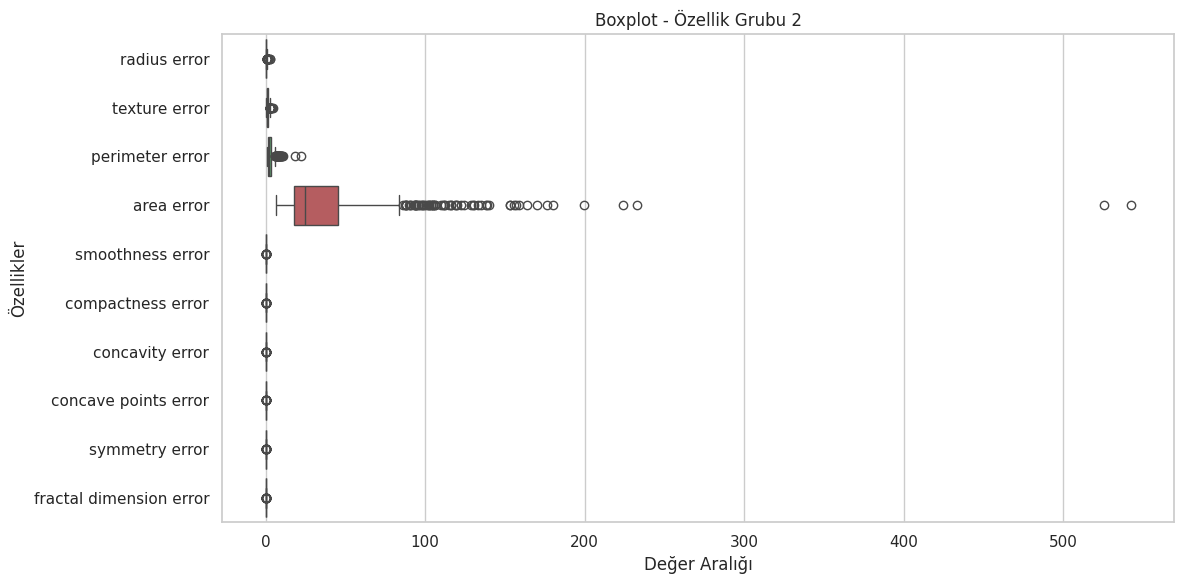

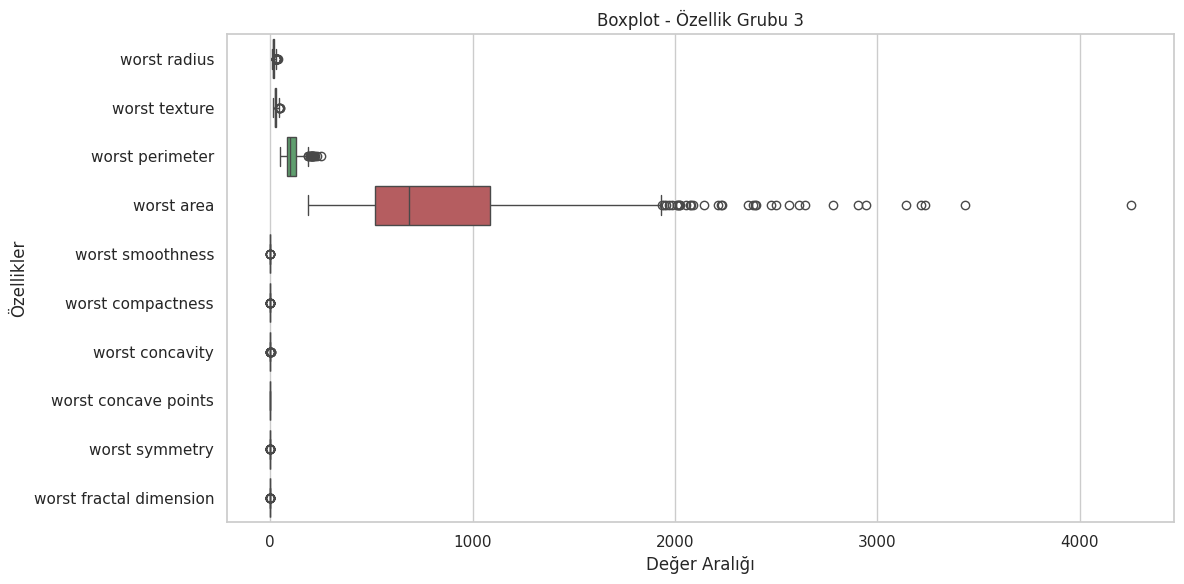

In [ ]:
feature_groups = [
    df_X.columns[0:10],
    df_X.columns[10:20],
    df_X.columns[20:30]
]

for i, cols in enumerate(feature_groups, start=1):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_X[cols], orient="h")
    plt.title(f"Boxplot - Özellik Grubu {i}")
    plt.xlabel("Değer Aralığı")
    plt.ylabel("Özellikler")
    plt.tight_layout()
    plt.show()


In [ ]:
# 2.2 Aykırı Değer Analizi – Z-score Yöntemi sadece sayısal özellikler (df_X) üzerinden Z-score hesaplayıp aykırı değerleri buluyor.

In [ ]:
import numpy as np

# 2.2 Z-score ile aykırı değer analizi

# Z-score hesaplama: (x - mean) / std
z_scores = (df_X - df_X.mean()) / df_X.std(ddof=0)

# Mutlak değeri alıyoruz
z_abs = np.abs(z_scores)

# Eşik değer (genelde 3 kullanılır)
threshold = 3

# Aykırı değer maskesi: |z| > threshold olan gözlemler aykırı
outlier_mask = z_abs > threshold

# Her sütundaki aykırı değer sayısı
z_outlier_counts = outlier_mask.sum().sort_values(ascending=False)

print("Z-score yöntemine göre sütun bazında aykırı değer sayıları:\n")
print(z_outlier_counts)

# En az bir aykırı değere sahip satır sayısı
rows_with_z_outlier = outlier_mask.any(axis=1).sum()
print(f"\nEn az bir Z-score aykırı değere sahip satır sayısı: {rows_with_z_outlier} / {df_X.shape[0]}")


Z-score yöntemine göre sütun bazında aykırı değer sayıları:

compactness error          12
symmetry error             11
worst area                 10
fractal dimension error    10
worst compactness          10
mean compactness            9
texture error               9
worst fractal dimension     9
worst symmetry              9
mean concavity              9
mean area                   8
perimeter error             8
radius error                7
mean perimeter              7
worst concavity             7
smoothness error            7
mean fractal dimension      7
worst radius                6
mean concave points         6
area error                  6
concavity error             6
concave points error        6
worst perimeter             6
mean symmetry               5
mean smoothness             5
mean radius                 5
mean texture                4
worst texture               4
worst smoothness            3
worst concave points        0
dtype: int64

En az bir Z-score aykırı 

In [ ]:
# 2.3 Veri Tipi ve Dağılım İncelemesi

In [ ]:
# Sayısal / kategorik değişken sayılarını raporlayın.

In [ ]:
import numpy as np

# Sayısal sütunlar
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Kategorik/diğer sütunlar (object, category vs.)
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Sayısal değişken sayısı:", len(num_cols))
print("Kategorik değişken sayısı:", len(cat_cols))

print("\nSayısal değişkenler:")
print(num_cols)

print("\nKategorik değişkenler:")
print(cat_cols)


Sayısal değişken sayısı: 31
Kategorik değişken sayısı: 1

Sayısal değişkenler:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

Kategorik değişkenler:
['target_name']


In [ ]:
# Sütunların dtype bilgilerini gösterin.

In [ ]:
# 2.3 Veri Tipi İncelemesi

print("Veri seti info():\n")
df.info()


Veri seti info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothn

In [ ]:
## 3. Keşifsel Veri Analizi (EDA)
## 3.1 İstatistiksel Özellikler

In [ ]:
# 3.1 İstatistiksel Özellikler

# Temel istatistikler (count, mean, std, min, 25%, 50%, 75%, max)
basic_stats = df_X.describe().T  # transpose ile satırlara çevirelim
basic_stats


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
## Q1–Q3’i ayrıca görmek için:

In [ ]:
# Q1 ve Q3'ü ayrıca hesaplayalım
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)

stats_full = pd.DataFrame({
    "mean": df_X.mean(),
    "median": df_X.median(),
    "min": df_X.min(),
    "max": df_X.max(),
    "std": df_X.std(),
    "Q1": Q1,
    "Q3": Q3
})

stats_full



,mean,median,min,max,std,Q1,Q3
mean radius,14.127292,13.370000,6.981000,28.11000,3.524049,11.700000,15.780000
mean texture,19.289649,18.840000,9.710000,39.28000,4.301036,16.170000,21.800000
mean perimeter,91.969033,86.240000,43.790000,188.50000,24.298981,75.170000,104.100000
mean area,654.889104,551.100000,143.500000,2501.00000,351.914129,420.300000,782.700000
mean smoothness,0.096360,0.095870,0.052630,0.16340,0.014064,0.086370,0.105300
mean compactness,0.104341,0.092630,0.019380,0.34540,0.052813,0.064920,0.130400
mean concavity,0.088799,0.061540,0.000000,0.42680,0.079720,0.029560,0.130700
mean concave points,0.048919,0.033500,0.000000,0.20120,0.038803,0.020310,0.074000
mean symmetry,0.181162,0.179200,0.106000,0.30400,0.027414,0.161900,0.195700
mean fractal dimension,0.062798,0.061540,0.049960,0.09744,0.007060,0.057700,0.066120


In [ ]:
# Kısa yorum (3.1): Birçok özelliğin minimum ve maksimum değerleri arasında ciddi farklar olabilir → bu da ölçeklendirme (scaling) ihtiyacını gösterir.
#std değeri yüksek olan sütunlar değişkenliği fazla olan özelliklerdir.
#Q1–Q3 aralığı dar olan sütunlar, daha “toplanmış” (düşük yayılımlı) verilere sahiptir.

In [ ]:
# 3.2 Korelasyon Matrisi

In [ ]:
# 3.2.1 Korelasyon Matrisi (Pearson)

In [ ]:
# 3.2 Korelasyon Matrisi (Pearson)

corr_matrix = df_X.corr(method="pearson")
corr_matrix.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


In [ ]:
# 3.2.2 Heatmap ile Görselleştirme

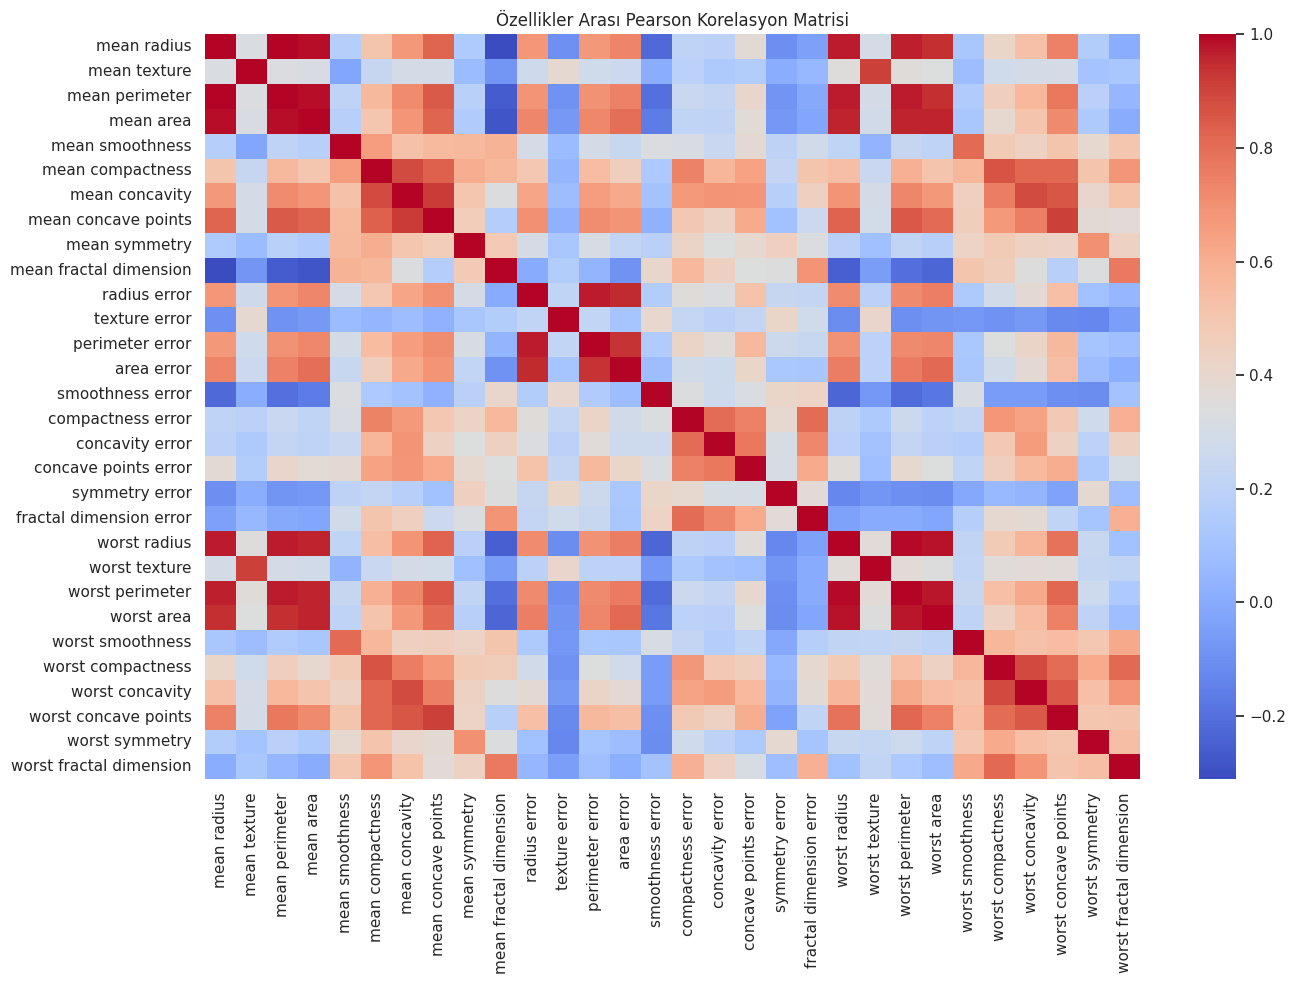

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Özellikler Arası Pearson Korelasyon Matrisi")
plt.tight_layout()
plt.show()


In [ ]:
# 3.2.3 En yüksek korelasyonlu 3 çift sütunu bulma

In [ ]:
# Korelasyon matrisi üzerinden en yüksek korelasyonlu 3 çifti bulalım
# (Kendisiyle olan korelasyonları ve tekrarları hariç tutacağız)

corr_unstack = corr_matrix.unstack()

# Aynı çiftin tekrarlanmasını ve diagonal (1.0) değerlerini filtrele
corr_unstack = corr_unstack[corr_unstack.index.get_level_values(0) < corr_unstack.index.get_level_values(1)]

# Mutlak değere göre sıralama
top3 = corr_unstack.abs().sort_values(ascending=False).head(3)

print("En yüksek korelasyonlu 3 özellik çifti (mutlak değer olarak):\n")
print(top3)


En yüksek korelasyonlu 3 özellik çifti (mutlak değer olarak):

mean perimeter   mean radius     0.997855
worst perimeter  worst radius    0.993708
mean area        mean radius     0.987357
dtype: float64


In [ ]:
# Çıktıdaki 3 çift de çok yüksek pozitif korelasyon gösteriyor (≈1’e çok yakın):mean perimeter – mean radius → 0.997855
#worst perimeter – worst radius → 0.993708
#mean area – mean radius → 0.987357

In [ ]:
# 3.3 Boxplot Analizi (Tüm Özellikler)  Boxplot’u 2.2’de outlier için kullanmıştık, ama bu adımda EDA bağlamında tekrar kullanıyoruz.

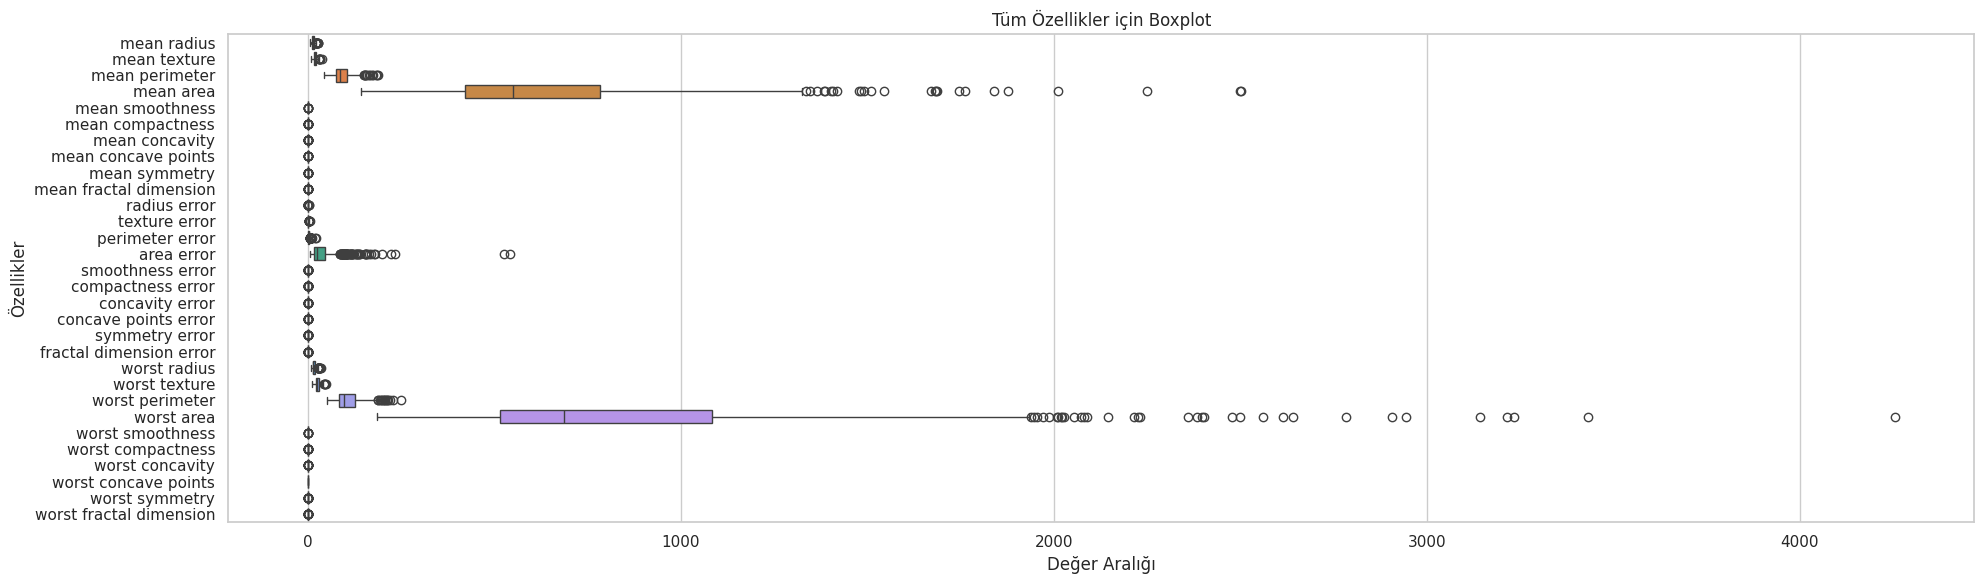

In [ ]:
# 3.3 Tüm özellikler için boxplot

plt.figure(figsize=(20, 6))
sns.boxplot(data=df_X, orient="h")
plt.title("Tüm Özellikler için Boxplot")
plt.xlabel("Değer Aralığı")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()


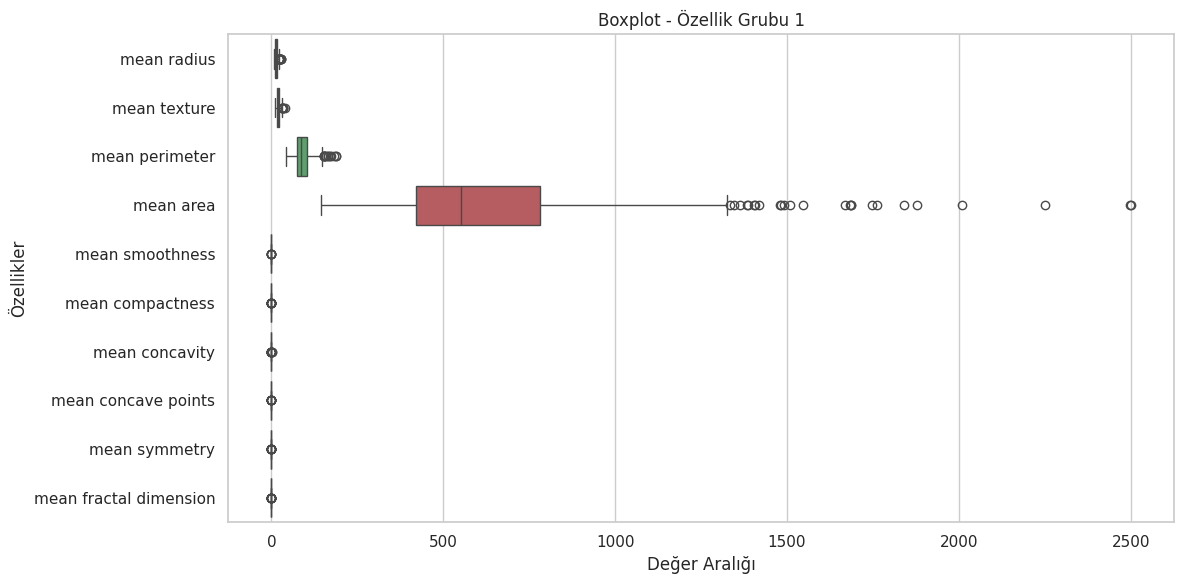

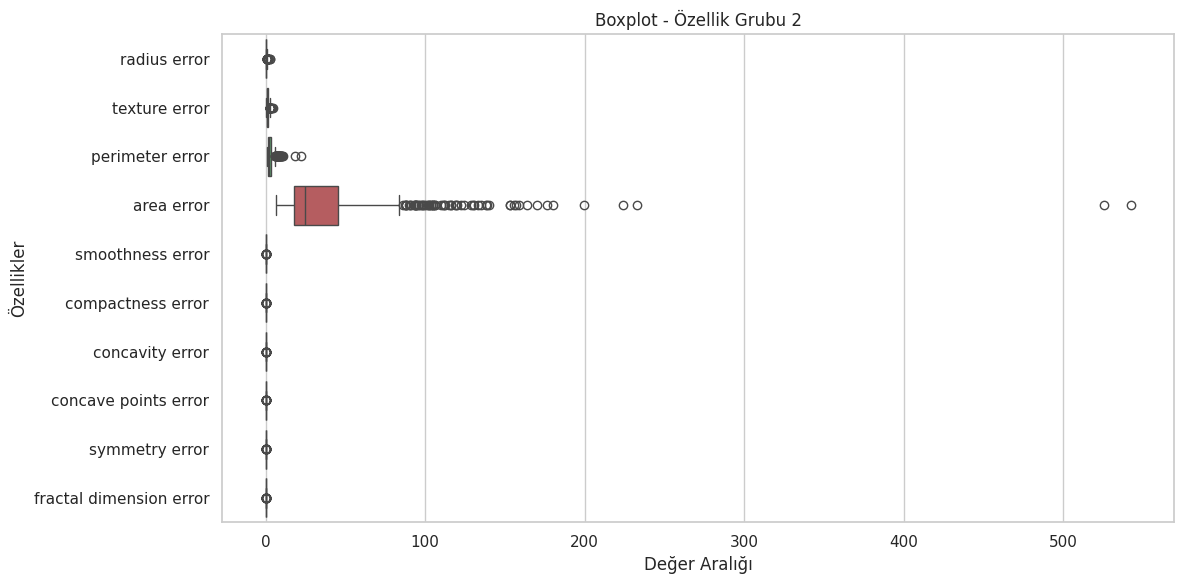

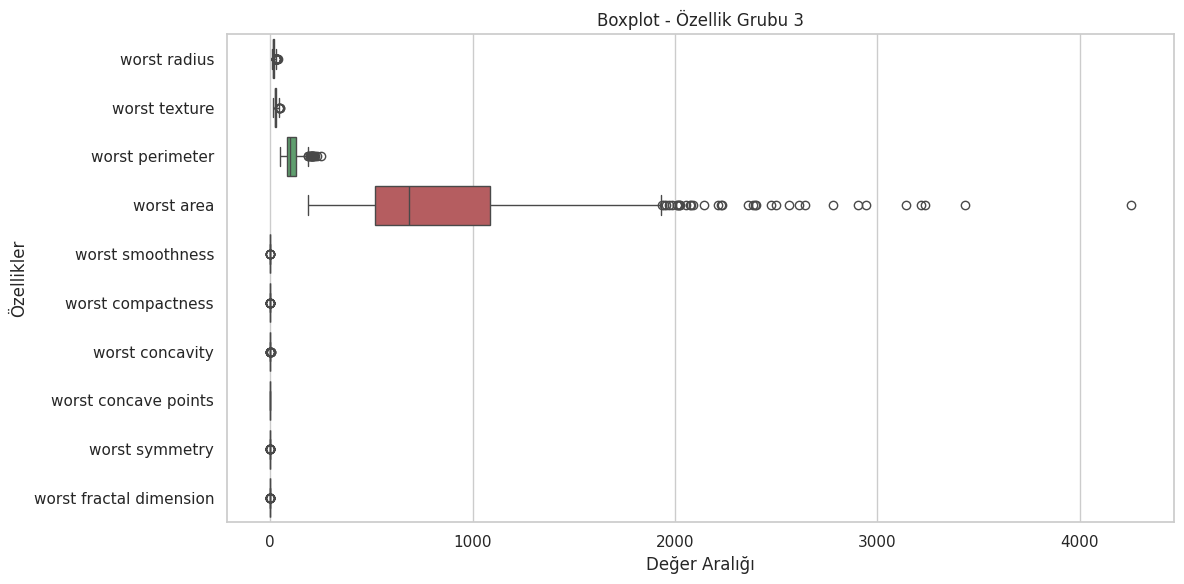

In [ ]:
# 10’arlı gruplar hâlinde daha okunaklı da yaptık
feature_groups = [
    df_X.columns[0:10],
    df_X.columns[10:20],
    df_X.columns[20:30]
]

for i, cols in enumerate(feature_groups, start=1):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_X[cols], orient="h")
    plt.title(f"Boxplot - Özellik Grubu {i}")
    plt.xlabel("Değer Aralığı")
    plt.ylabel("Özellikler")
    plt.tight_layout()
    plt.show()


In [ ]:
# üstün yorumu Kısa yorum (3.3):Bazı özelliklerde bıyıkların dışında yer alan noktalar olduğu görülmektedir; bunlar veri setindeki aykırı değerleri temsil etmektedir.
#Özellikle tümör boyutu ve doku yoğunluğu ile ilgili özelliklerde (örneğin “worst” veya “area” ile ilgili değişkenler) daha fazla outlier gözlemlenebilir.
#Bu patern, 2.2’de yaptığımız IQR ve Z-score outlier analizleri ile uyumludur.

In [ ]:
# 4. Veri Ölçeklendirme (Scaling)

In [ ]:
# 4.1 StandardScaler ile ölçeklendirme

In [ ]:
from sklearn.preprocessing import StandardScaler

# 4. Veri Ölçeklendirme

scaler = StandardScaler()

# Sadece özellikleri (df_X) ölçeklendiriyoruz, target'a dokunmuyoruz
X_scaled_array = scaler.fit_transform(df_X)

# Kolay takip edebilmek için DataFrame'e geri çevirelim
X_scaled = pd.DataFrame(X_scaled_array, columns=df_X.columns)

# İlk 5 satıra bakalım
X_scaled.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
X_scaled.describe().T[["mean", "std"]].head(10) # Ölçeklemenin gerçekten çalıştığını kontrol etmek için  bizimkikisi düzgün çalışmış:)


,mean,std
mean radius,-3.153111e-15,1.00088
mean texture,-6.568462e-15,1.00088
mean perimeter,-6.993039e-16,1.00088
mean area,-8.553985e-16,1.00088
mean smoothness,6.081447e-15,1.00088
mean compactness,-1.136369e-15,1.00088
mean concavity,-2.997017e-16,1.00088
mean concave points,1.023981e-15,1.00088
mean symmetry,-1.860648e-15,1.00088
mean fractal dimension,-1.504752e-15,1.00088


In [ ]:
# 5. Veri Setinin Bölünmesi
# Veri şu şekilde bölünecektir:
 # •	%70 Training
# #•	%10 Validation
# %20 Test
# Not: Validation için ikinci bir train_test_split kullanılabilir.
# Bunu yapmanın en temiz yolu:
# Önce %20 test seti ayırıyoruz.
# Kalan %80’in içinden %12.5’ini validation yapıyoruz.
# Çünkü: 0.8 × 0.125 = 0.1 (yani toplamın %10’u).

In [ ]:
from sklearn.model_selection import train_test_split

# X_scaled: ölçeklenmiş özellikler
# df_y veya df["target"]: hedef değişken

y = df["target"]  # net olsun diye

# 1) Önce Test setini ayıralım (%20)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y,
    test_size=0.20,
    stratify=y,           # sınıf dengesi korunsun
    random_state=42
)

# 2) Kalan %80'i Train (%70) ve Validation (%10) olarak ayıralım
# 0.8 * 0.125 = 0.10  --> toplamın %10'u validation olacak
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.125,
    stratify=y_train_val,
    random_state=42
)

# Şekillere bakalım
print("Train boyutu:", X_train.shape, y_train.shape)
print("Validation boyutu:", X_val.shape, y_val.shape)
print("Test boyutu:", X_test.shape, y_test.shape)

# Sınıf dağılımlarını da görelim (opsiyonel ama güzel)
print("\nSınıf dağılımı - Train:")
print(y_train.value_counts(normalize=True))

print("\nSınıf dağılımı - Validation:")
print(y_val.value_counts(normalize=True))

print("\nSınıf dağılımı - Test:")
print(y_test.value_counts(normalize=True))


Train boyutu: (398, 30) (398,)
Validation boyutu: (57, 30) (57,)
Test boyutu: (114, 30) (114,)

Sınıf dağılımı - Train:
target
1    0.625628
0    0.374372
Name: proportion, dtype: float64

Sınıf dağılımı - Validation:
target
1    0.631579
0    0.368421
Name: proportion, dtype: float64

Sınıf dağılımı - Test:
target
1    0.631579
0    0.368421
Name: proportion, dtype: float64


In [ ]:
# Kısa yorum (5. adım): Veri %70 train, %10 validation, %20 test olacak şekilde bölündü.
# stratify kullanarak her setteki sınıf oranlarını koruduk, böylece dengesiz bir alt küme oluşmadı.

In [ ]:
# 6. Farklı MLP Modellerinin Kurulması

In [ ]:
# 5 farklı model değerlerinin ele alınması

In [ ]:
from sklearn.neural_network import MLPClassifier

# 6. MLP modellerini tanımlayalım

models = {}

# Model 1 – Basit
models["Model 1 - Basit"] = MLPClassifier(
    hidden_layer_sizes=(16,),
    activation="relu",
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# Model 2 – Orta
models["Model 2 - Orta"] = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    learning_rate_init=0.005,
    max_iter=500,
    random_state=42
)

# Model 3 – Geniş
models["Model 3 - Geniş"] = MLPClassifier(
    hidden_layer_sizes=(64, 64),
    activation="tanh",
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# Model 4 – Derin
models["Model 4 - Derin"] = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation="relu",
    learning_rate_init=0.0005,
    max_iter=700,      # biraz daha derin olduğu için iterasyonu artırdık
    random_state=42
)

# Model 5 – Düşük Öğrenme Oranlı
models["Model 5 - Düşük LR"] = MLPClassifier(
    hidden_layer_sizes=(32,),
    activation="relu",
    learning_rate_init=0.0001,
    max_iter=700,
    random_state=42
)

# 6.2 Modelleri Train seti üzerinde eğitelim
trained_models = {}

for name, model in models.items():
    print(f"Eğitiliyor: {name}")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"  -> Train accuracy: {model.score(X_train, y_train):.4f}\n")


Eğitiliyor: Model 1 - Basit
  -> Train accuracy: 0.9925

Eğitiliyor: Model 2 - Orta
  -> Train accuracy: 1.0000

Eğitiliyor: Model 3 - Geniş
  -> Train accuracy: 1.0000

Eğitiliyor: Model 4 - Derin
  -> Train accuracy: 1.0000

Eğitiliyor: Model 5 - Düşük LR
  -> Train accuracy: 0.9849



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 7. Validation Performanslarının Ölçülmesi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

val_results = []

for name, model in trained_models.items():
    # Tahminler
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]  # sınıf 1 olasılığı

    # Metrikler
    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc = roc_auc_score(y_val, y_val_proba)

    val_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc
    })

# Sonuçları tabloya dökelim
val_results_df = pd.DataFrame(val_results)
val_results_df = val_results_df.set_index("Model")

val_results_df.sort_values("Accuracy", ascending=False)


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Model 1 - Basit,0.964912,0.947368,1.000000,0.972973,0.993386
Model 2 - Orta,0.964912,0.972222,0.972222,0.972222,0.993386
Model 4 - Derin,0.964912,0.947368,1.000000,0.972973,0.989418
Model 3 - Geniş,0.947368,0.945946,0.972222,0.958904,0.994709
Model 5 - Düşük LR,0.947368,0.945946,0.972222,0.958904,0.994709


In [ ]:
# 8. En İyi Modelin Test Üzerinde Değerlendirilmesi

In [ ]:
# En iyi model olarak model 1 seçildi

In [ ]:
best_model_name = "Model 1 - Basit"
best_model = trained_models[best_model_name]
best_model


MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42)

In [ ]:
# 8.1 Performans Metrikleri

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Tahminler
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # sınıf 1 (benign) olasılığı

# Metrikler
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"En iyi model: {best_model_name}\n")
print(f"Test Accuracy : {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall   : {test_rec:.4f}")
print(f"Test F1-Score : {test_f1:.4f}")
print(f"Test ROC-AUC  : {test_roc_auc:.4f}")


En iyi model: Model 1 - Basit

Test Accuracy : 0.9474
Test Precision: 0.9714
Test Recall   : 0.9444
Test F1-Score : 0.9577
Test ROC-AUC  : 0.9904


In [ ]:
# 8.2 8.2 Confusion Matrix (seaborn heatmap)

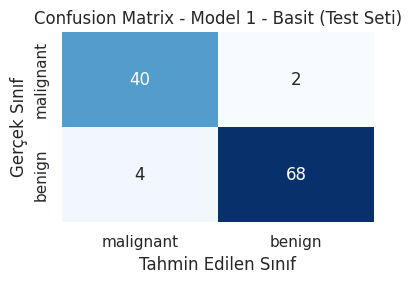

Confusion matrix (TN, FP / FN, TP):
 [[40  2]
 [ 4 68]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=data.target_names,   # ['malignant', 'benign']
    yticklabels=data.target_names
)
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title(f"Confusion Matrix - {best_model_name} (Test Seti)")
plt.tight_layout()
plt.show()

print("Confusion matrix (TN, FP / FN, TP):\n", cm)


In [ ]:
# 8.3 ROC Eğrisi

In [ ]:
# 8.3.1	ROC curve + AUC değeri

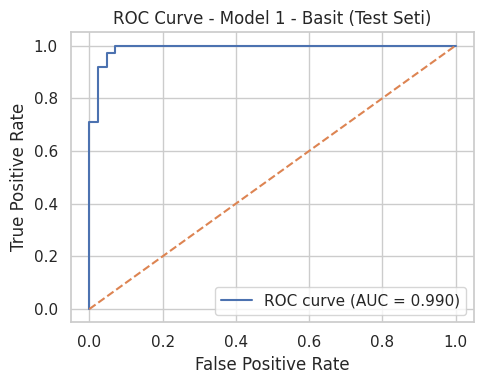

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_curve:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # rastgele sınıflandırıcı çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name} (Test Seti)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
# 8.3.2 Eşik (Threshold) Değişiminin Etkisini İnceleme

In [ ]:
def metrics_for_threshold(thr):
    y_pred_thr = (y_test_proba >= thr).astype(int)
    acc = accuracy_score(y_test, y_pred_thr)
    prec = precision_score(y_test, y_pred_thr)
    rec = recall_score(y_test, y_pred_thr)
    f1 = f1_score(y_test, y_pred_thr)
    print(f"Eşik = {thr:.2f} -> Acc: {acc:.3f}, Prec: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

for thr in [0.3, 0.5, 0.7]:
    metrics_for_threshold(thr)


Eşik = 0.30 -> Acc: 0.974, Prec: 0.960, Recall: 1.000, F1: 0.980
Eşik = 0.50 -> Acc: 0.947, Prec: 0.971, Recall: 0.944, F1: 0.958
Eşik = 0.70 -> Acc: 0.939, Prec: 0.985, Recall: 0.917, F1: 0.950


In [ ]:
# 9. Optuna ile Hiperparametre Optimizasyonu (150 Deneme)

In [ ]:
# 9.1 Optuna Kurulumu ve Study Tanımı

In [ ]:
!pip install optuna --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")  # ConvergenceWarning vs. görmezden gelmek için (opsiyonel)

# Optuna study (F1-score'u maksimize ediyoruz)
study = optuna.create_study(
    direction="maximize",
    study_name="breast_cancer_mlp_optuna",
    sampler=optuna.samplers.TPESampler(seed=42)
)


[I 2025-11-25 19:54:07,150] A new study created in memory with name: breast_cancer_mlp_optuna


In [ ]:
# 9.2 Optuna Arama Aralıkları

In [ ]:
def objective(trial):
    # ------------- Hiperparametre Aralıkları (9.2) -------------
    n_hidden1 = trial.suggest_int("n_hidden1", 16, 256)
    n_hidden2 = trial.suggest_int("n_hidden2", 8, 128)
    hidden_layer_sizes = (n_hidden1, n_hidden2)

    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
    alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    solver = trial.suggest_categorical("solver", ["adam", "sgd"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # ------------- MLP Modeli Kurulması (9.3) -------------
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        learning_rate_init=learning_rate_init,
        alpha=alpha,
        solver=solver,
        batch_size=batch_size,
        max_iter=1000,
        random_state=42
    )

    # X_train, y_train, X_val, y_val önceki adımlardan geliyor
    model.fit(X_train, y_train)

    # Validation performansını hesapla (metric = F1-score)
    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)

    # İstersen accuracy de loglayabiliriz
    trial.set_user_attr("val_accuracy", accuracy_score(y_val, y_val_pred))

    return f1


In [ ]:
# 9.3 Eğitim Döngüsü
# 150 Denemelik Optimizasyon Koşusu

In [ ]:
# 150 trial çalıştır
study.optimize(objective, n_trials=150)

print("En iyi trial index   :", study.best_trial.number)
print("En iyi F1-score (val):", study.best_value)


[I 2025-11-25 19:56:18,971] Trial 0 finished with value: 0.9722222222222222 and parameters: {'n_hidden1': 106, 'n_hidden2': 123, 'learning_rate_init': 0.008471801418819975, 'alpha': 0.0002481040974867811, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 128}. Best is trial 0 with value: 0.9722222222222222.
[I 2025-11-25 19:56:30,595] Trial 1 finished with value: 0.972972972972973 and parameters: {'n_hidden1': 216, 'n_hidden2': 33, 'learning_rate_init': 5.3370327626039544e-05, 'alpha': 5.415244119402541e-06, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.972972972972973.
[I 2025-11-25 19:56:37,035] Trial 2 finished with value: 0.9722222222222222 and parameters: {'n_hidden1': 125, 'n_hidden2': 103, 'learning_rate_init': 6.290644294586152e-05, 'alpha': 0.00011400863701127338, 'activation': 'relu', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.972972972972973.
[I 2025-11-25 19:56:40,005] Trial 3 finished with value: 0.97297

En iyi trial index   : 15
En iyi F1-score (val): 0.9863013698630136


In [ ]:
# 9.4 En İyi Trial’ın Raporlanması

In [ ]:
 # 9.4.1 En iyi hiperparametrelerin yazdırılması

In [ ]:
best_trial = study.best_trial

print("\n>>> En iyi trial hiperparametreleri:")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")

print("\nEn iyi trial'a ait validation F1-score:", best_trial.value)
print("En iyi trial'a ait validation accuracy:",
      best_trial.user_attrs.get("val_accuracy"))



>>> En iyi trial hiperparametreleri:
n_hidden1: 181
n_hidden2: 52
learning_rate_init: 4.3542325664671334e-05
alpha: 7.776998020382486e-06
activation: tanh
solver: adam
batch_size: 32

En iyi trial'a ait validation F1-score: 0.9863013698630136
En iyi trial'a ait validation accuracy: 0.9824561403508771


In [ ]:
# 9.4.2 En iyi parametrelerle modeli yeniden eğit ve validation metriklerini göster

In [ ]:
# En iyi parametreler ile modeli yeniden kur
best_params = best_trial.params

best_optuna_model = MLPClassifier(
    hidden_layer_sizes=(best_params["n_hidden1"], best_params["n_hidden2"]),
    activation=best_params["activation"],
    learning_rate_init=best_params["learning_rate_init"],
    alpha=best_params["alpha"],
    solver=best_params["solver"],
    batch_size=best_params["batch_size"],
    max_iter=1000,
    random_state=42
)

best_optuna_model.fit(X_train, y_train)

# Validation setinde değerlendirme
y_val_pred_opt = best_optuna_model.predict(X_val)
y_val_proba_opt = best_optuna_model.predict_proba(X_val)[:, 1]

val_acc_opt = accuracy_score(y_val, y_val_pred_opt)
val_prec_opt = precision_score(y_val, y_val_pred_opt)
val_rec_opt = recall_score(y_val, y_val_pred_opt)
val_f1_opt = f1_score(y_val, y_val_pred_opt)
val_roc_opt = roc_auc_score(y_val, y_val_proba_opt)

print("\n>>> Optuna ile bulunan en iyi modelin VALIDATION metrikleri:")
print(f"Accuracy : {val_acc_opt:.4f}")
print(f"Precision: {val_prec_opt:.4f}")
print(f"Recall   : {val_rec_opt:.4f}")
print(f"F1-Score : {val_f1_opt:.4f}")
print(f"ROC-AUC  : {val_roc_opt:.4f}")



>>> Optuna ile bulunan en iyi modelin VALIDATION metrikleri:
Accuracy : 0.9825
Precision: 0.9730
Recall   : 1.0000
F1-Score : 0.9863
ROC-AUC  : 0.9974


In [ ]:
#İstersen bunu küçük bir tabloya da dökebilirsin:

In [ ]:
optuna_val_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Value":  [val_acc_opt, val_prec_opt, val_rec_opt, val_f1_opt, val_roc_opt]
})
optuna_val_results


,Metric,Value
0,Accuracy,0.982456
1,Precision,0.972973
2,Recall,1.000000
3,F1-Score,0.986301
4,ROC-AUC,0.997354


In [ ]:
# 10. SHAP Açıklanabilirlik Analizi

In [ ]:
!pip install shap --quiet


In [ ]:
import shap
shap.initjs()

# SHAP için arka plan (background) verisi: train'den küçük bir örnek
background = X_train.sample(100, random_state=42)  # hız için 100 örnek yeterli


In [ ]:
#10.1 En iyi 5 MLP modelinden seçilen model (Model 1 – Basit) için SHAP

In [ ]:
# 10.1.1 Explainer ve SHAP değerleri (validation seti üzerinde)

In [ ]:
# Bizim daha önce seçtiğimiz en iyi model:
best_mlp_model = best_model   # Model 1 - Basit

# KernelExplainer: model.predict_proba'yı kullanıyoruz (sınıf 1 olasılığı)
explainer_mlp = shap.KernelExplainer(
    model=best_mlp_model.predict_proba,
    data=background
)

# Validation verisi için SHAP değerleri
shap_values_mlp = explainer_mlp.shap_values(X_val)

# Binary sınıflandırmada shap_values bir liste:
# 0 -> class 0, 1 -> class 1 (benign)
len(shap_values_mlp)


  0%|          | 0/57 [00:00<?, ?it/s]

57

In [ ]:
# 10.1.2 summary_plot (noktalı global önem)

In [ ]:
shap.summary_plot(
    shap_values_mlp[1],   # sınıf 1'in SHAP değerleri
    X_val,
    feature_names=X_val.columns,
    show=True
)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
# aşağıda 10.1 ı yenıden kuruyoruz

In [ ]:
import shap
shap.initjs()

# Hız için train'den küçük bir arka plan seti kullanıyoruz
background = X_train.sample(100, random_state=42)


In [ ]:
# Bizim "en iyi MLP modelimiz" (Model 1 - Basit)
best_mlp_model = best_model   # daha önce: best_model = trained_models["Model 1 - Basit"]

def predict_proba_class1(X):
    """
    SHAP'e verilecek fonksiyon.
    X: DataFrame veya numpy array
    Çıktı: sınıf 1 (benign) olasılığı, şekil: (n_samples,)
    """
    return best_mlp_model.predict_proba(X)[:, 1]


In [ ]:
X_val_for_shap = X_val.copy()  # sadece isim olarak net olsun

explainer_mlp = shap.KernelExplainer(
    predict_proba_class1,
    background
)

# Bu biraz sürebilir
shap_values_mlp = explainer_mlp.shap_values(X_val_for_shap)


  0%|          | 0/57 [00:00<?, ?it/s]

In [ ]:
import numpy as np

print("shap_values_mlp shape:", np.array(shap_values_mlp).shape)
print("X_val_for_shap shape :", X_val_for_shap.shape)


shap_values_mlp shape: (57, 30)
X_val_for_shap shape : (57, 30)


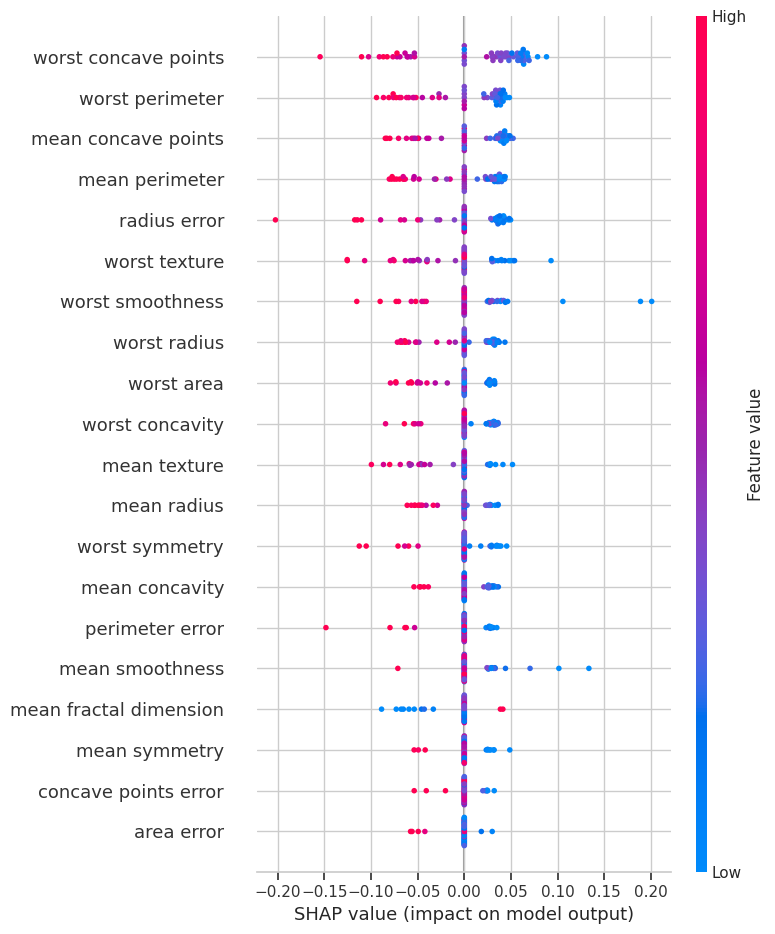

In [ ]:
# Noktalı summary plot (global önem)
shap.summary_plot(
    shap_values_mlp,
    X_val_for_shap,
    feature_names=X_val_for_shap.columns,
    show=True
)


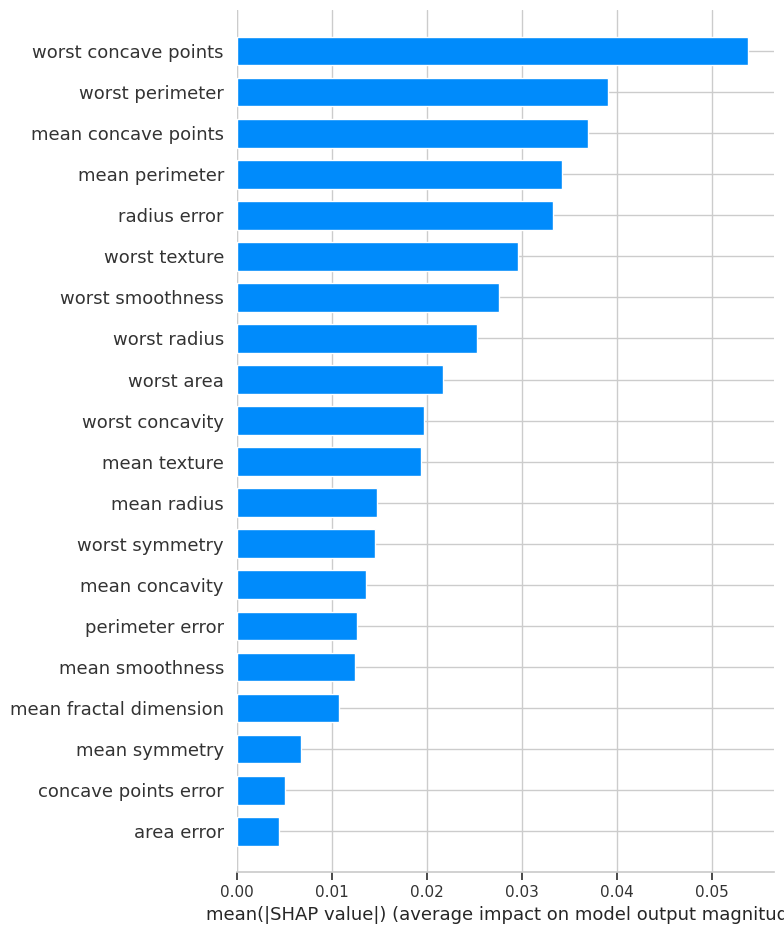

In [ ]:
# Bar plot (ortalama mutlak SHAP = feature importance)
shap.summary_plot(
    shap_values_mlp,
    X_val_for_shap,
    feature_names=X_val_for_shap.columns,
    plot_type="bar",
    show=True
)


In [ ]:
import numpy as np

mean_abs_shap = np.mean(np.abs(shap_values_mlp), axis=0)
feature_importance = pd.DataFrame({
    "feature": X_val_for_shap.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

feature_importance.head(10)


,feature,mean_abs_shap
27,worst concave points,0.053841
22,worst perimeter,0.039086
7,mean concave points,0.036966
2,mean perimeter,0.034214
10,radius error,0.033216
21,worst texture,0.029525
24,worst smoothness,0.027620
20,worst radius,0.025302
23,worst area,0.021638
26,worst concavity,0.019681


In [ ]:
# 10.2 son duzenleme sonrası

In [ ]:
opt_model = best_optuna_model  # Optuna’dan gelen en iyi MLP

def predict_proba_class1_opt(X):
    return opt_model.predict_proba(X)[:, 1]


In [ ]:
explainer_opt = shap.KernelExplainer(
    predict_proba_class1_opt,
    background
)

shap_values_opt = explainer_opt.shap_values(X_val_for_shap)

import numpy as np
print("shap_values_opt shape:", np.array(shap_values_opt).shape)


  0%|          | 0/57 [00:00<?, ?it/s]

shap_values_opt shape: (57, 30)


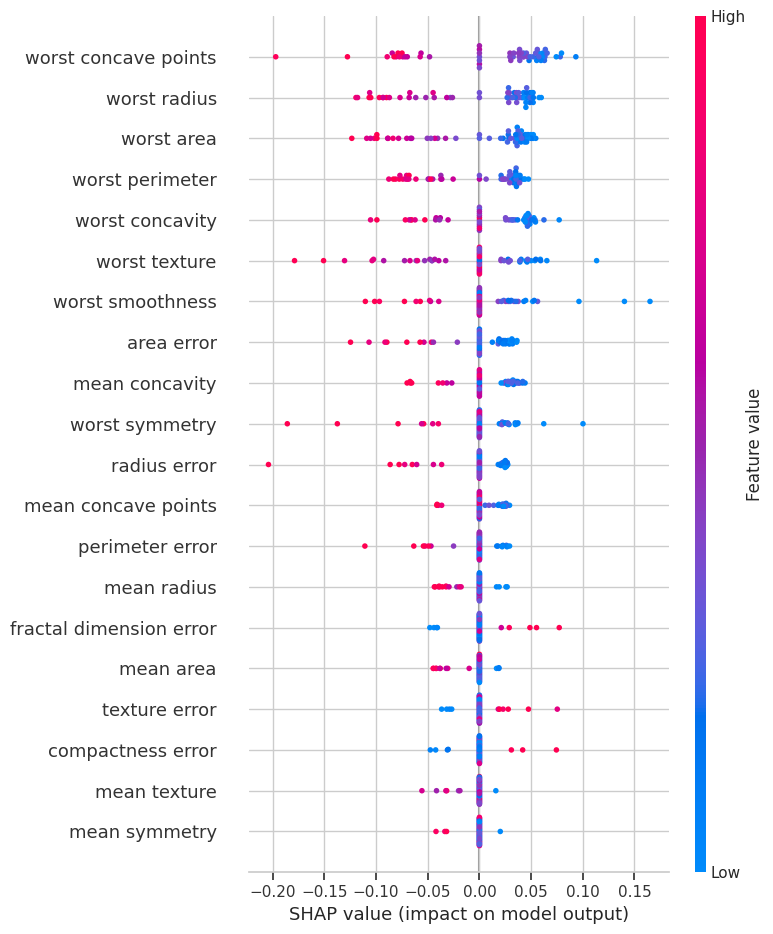

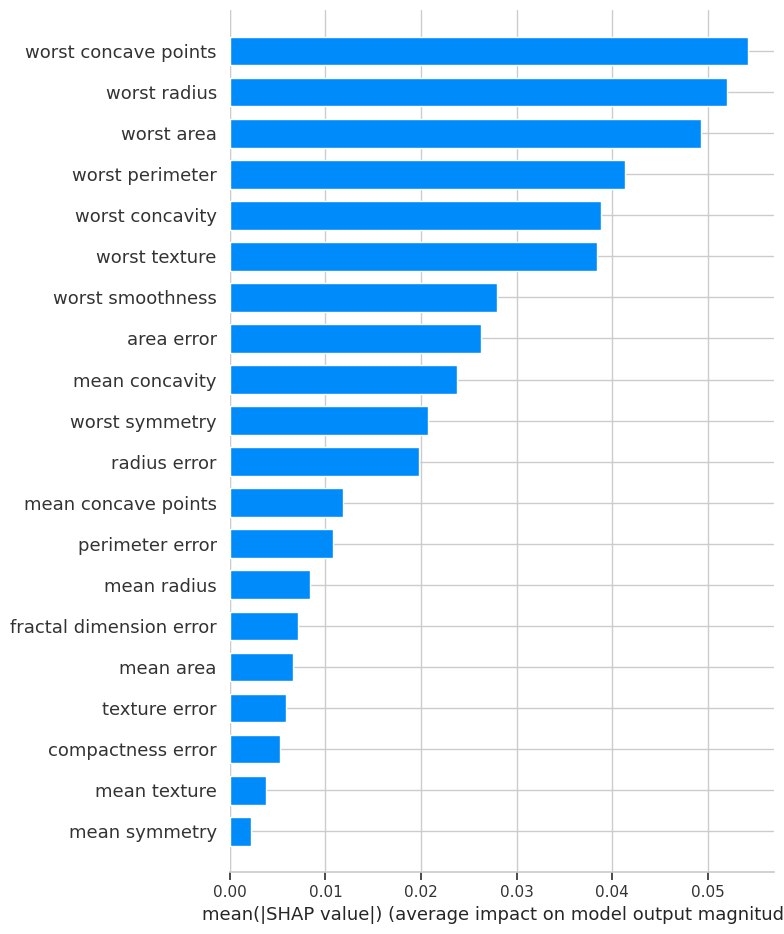

In [ ]:
# Noktalı summary plot
shap.summary_plot(
    shap_values_opt,
    X_val_for_shap,
    feature_names=X_val_for_shap.columns,
    show=True
)

# Bar plot
shap.summary_plot(
    shap_values_opt,
    X_val_for_shap,
    feature_names=X_val_for_shap.columns,
    plot_type="bar",
    show=True
)


In [ ]:
mean_abs_shap_opt = np.mean(np.abs(shap_values_opt), axis=0)
feature_importance_opt = pd.DataFrame({
    "feature": X_val_for_shap.columns,
    "mean_abs_shap": mean_abs_shap_opt
}).sort_values("mean_abs_shap", ascending=False)

feature_importance_opt.head(10)


,feature,mean_abs_shap
27,worst concave points,0.054228
20,worst radius,0.052043
23,worst area,0.049270
22,worst perimeter,0.041313
26,worst concavity,0.038857
21,worst texture,0.038444
24,worst smoothness,0.028000
13,area error,0.026264
6,mean concavity,0.023811
28,worst symmetry,0.020775


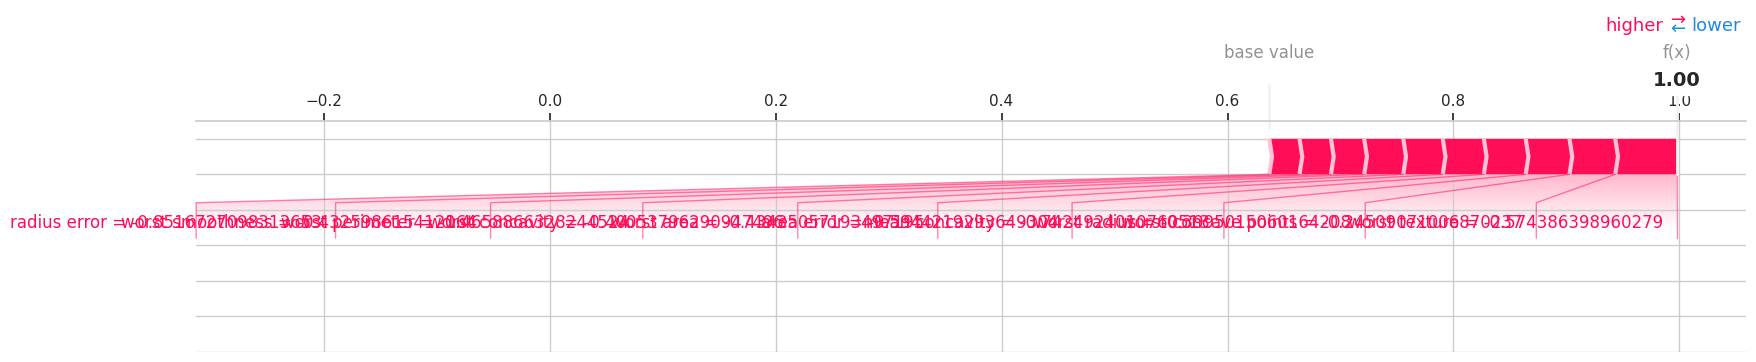

In [ ]:
i = 0

shap.force_plot(
    explainer_opt.expected_value,
    shap_values_opt[i, :],
    X_val_for_shap.iloc[i, :],
    matplotlib=True
)


In [ ]:
# Daha okunaklı olsun diye birkaç örnek seçelim
sample_idx = [0, 1, 2, 3, 4]

shap.decision_plot(
    explainer_opt.expected_value,
    shap_values_opt[sample_idx, :],
    feature_names=X_val_for_shap.columns
)


TypeError: The feature_names arg requires a list or numpy array.

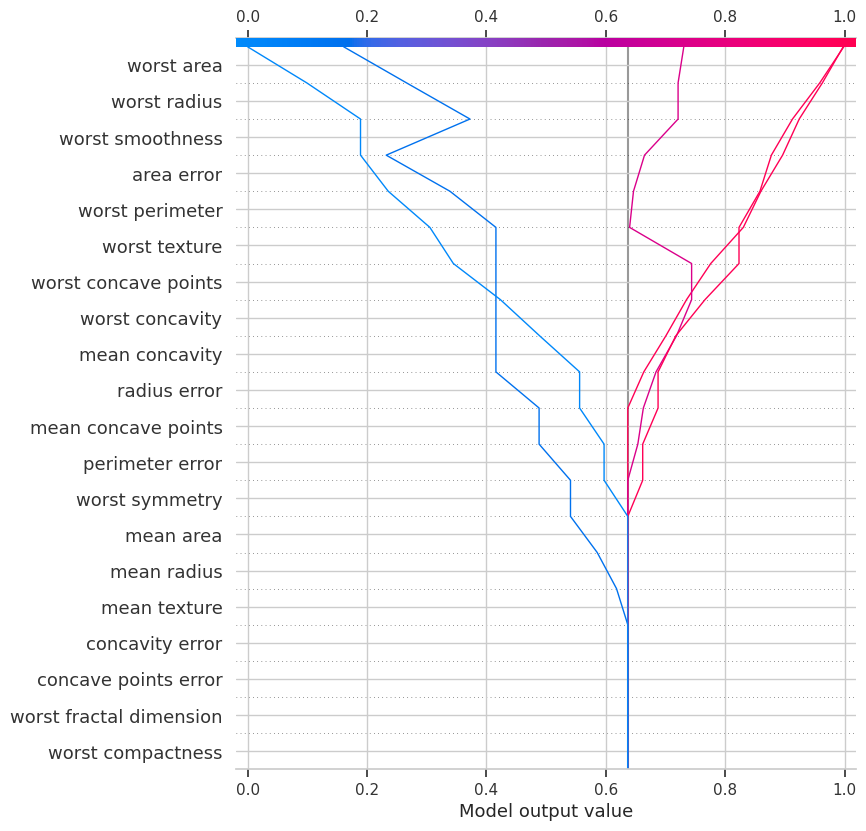

In [ ]:
sample_idx = [0, 1, 2, 3, 4]

feature_names = list(X_val_for_shap.columns)   # 👈 kritik kısım

shap.decision_plot(
    explainer_opt.expected_value,
    shap_values_opt[sample_idx, :],
    feature_names=feature_names
)


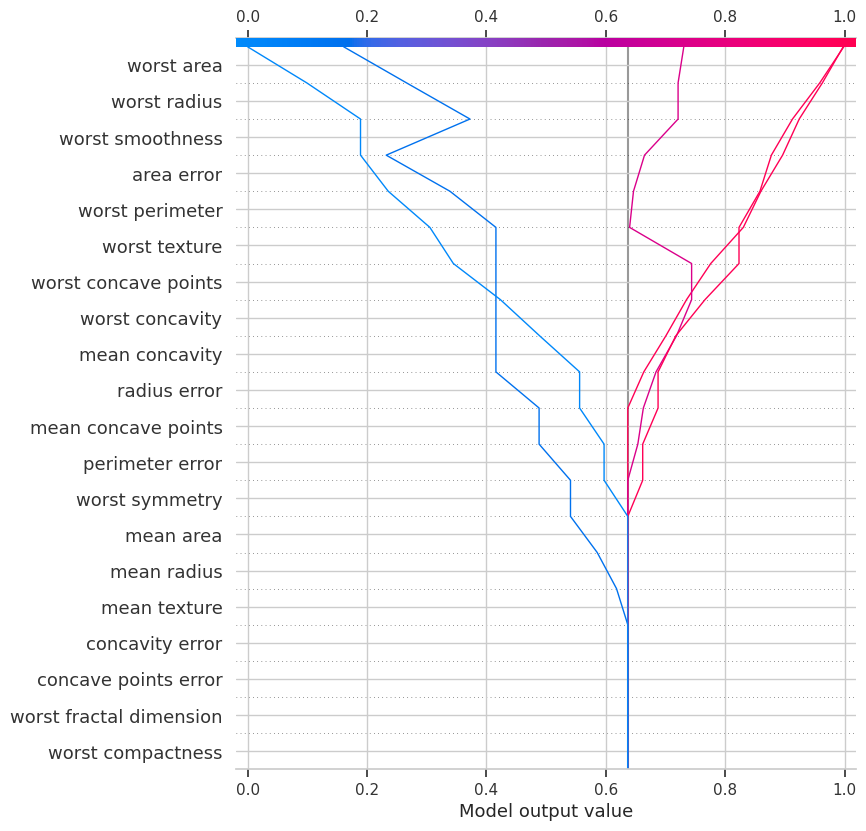

In [ ]:
import numpy as np

shap_values_opt_arr = np.array(shap_values_opt)   # (57, 30) olması lazım

sample_idx = [0, 1, 2, 3, 4]
feature_names = list(X_val_for_shap.columns)

shap.decision_plot(
    explainer_opt.expected_value,
    shap_values_opt_arr[sample_idx, :],
    feature_names=feature_names
)


In [ ]:
#10.1.3

In [ ]:
shap.summary_plot(
    shap_values_mlp[1],
    X_val,
    feature_names=X_val.columns,
    plot_type="bar",
    show=True
)


In [ ]:
# 10.2 Optuna ile bulunan en iyi model için SHAP Analizi

In [ ]:
# 10.2.1 Explainer ve SHAP değerleri (validation seti)

In [ ]:
# Optuna ile bulunan en iyi model
opt_model = best_optuna_model

explainer_opt = shap.KernelExplainer(
    model=opt_model.predict_proba,
    data=background
)

shap_values_opt = explainer_opt.shap_values(X_val)


In [ ]:
# 10.2.2 summary_plot (dots)

In [ ]:
shap.summary_plot(
    shap_values_opt[1],
    X_val,
    feature_names=X_val.columns,
    show=True
)


In [ ]:
# 10.2.3 bar_plot (ortalama etki büyüklükleri)

In [ ]:
shap.summary_plot(
    shap_values_opt[1],
    X_val,
    feature_names=X_val.columns,
    plot_type="bar",
    show=True
)


In [ ]:
# 10.2.4 force_plot (tek bir örnek için karar açıklaması)

In [ ]:
i = 0  # incelemek istediğin örnek
shap.force_plot(
    explainer_opt.expected_value[1],
    shap_values_opt[1][i],
    X_val.iloc[i, :],
    matplotlib=True
)


In [ ]:
# 10.2.5 decision_plot (özelliklere göre karar yolu)

In [ ]:
shap.decision_plot(
    explainer_opt.expected_value[1],
    shap_values_opt[1],
    feature_names=X_val.columns
)


In [ ]:
sample_idx = [0, 1, 2, 3, 4]  # ilk 5 örnek
shap.decision_plot(
    explainer_opt.expected_value[1],
    shap_values_opt[1][sample_idx],
    feature_names=X_val.columns
)
